##FOLLOW THESE STEPS TO RUN THIS WORKBOOK

1. Click the arrow above. This example is circled in red in the below illustration.


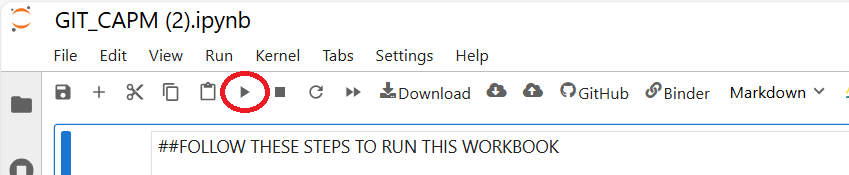

2. Take note of the block of code illustrated below. A blue bar will be on the left of each block as pointed at in the red arrow.  

  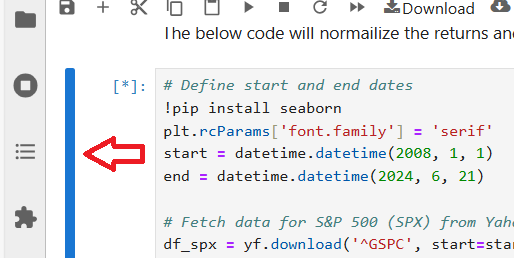

3. Run the blocks from top to bottom—don't skip any, as each subsequent block builds on the previous one.

4. After executing each code block, a corresponding graph or chart will be displayed. Additionally, towards the end of the workbook, you'll find interactive graphs and charts that respond as you hover your mouse over them.


In [ ]:
!pip install pycaret
!pip install yfinance
import datetime
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
!pip install dash
from dash import Dash, dcc, html, Input, Output
from sklearn.model_selection import train_test_split
from sklearn import linear_model, tree, neighbors
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from plotly.subplots import make_subplots
from sklearn.preprocessing import PolynomialFeatures

##THE DOWNLOADED RETURNS WERE NORMALIZED

**Normalized Returns: Comparing Exxon and the S&P 500**

When comparing securities with vastly different prices (like Exxon and the S&P 500), we use **normalized returns**.

The **Objective**: Eliminate bias caused by price differences. **Result**: Fair comparison without the noise of price variations.

The below code will normailize the returns and put them into a chart.





[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


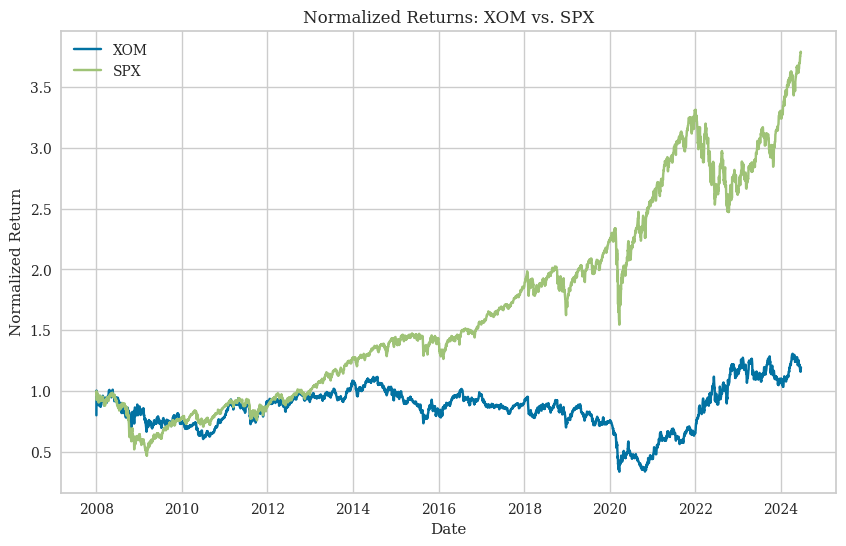

In [ ]:
# Define start and end dates
!pip install seaborn
plt.rcParams['font.family'] = 'serif'
start = datetime.datetime(2008, 1, 1)
end = datetime.datetime(2024, 6, 21)

# Fetch data for S&P 500 (SPX) from Yahoo Finance using yfinance
df_spx = yf.download('^GSPC', start=start, end=end)  # Use '^GSPC' instead of 'SPX'
df_xom = yf.download('XOM', start=start, end=end)  # Use XOM
# Calculate daily returns
df_xom['Daily_Return'] = df_xom['Adj Close'].pct_change()
df_spx['Daily_Return'] = df_spx['Adj Close'].pct_change()

# Normalize returns
df_xom['Normalized_Return'] = (1 + df_xom['Daily_Return']).cumprod()
df_spx['Normalized_Return'] = (1 + df_spx['Daily_Return']).cumprod()

#Remove Null Values Replace with Mode
for column in df_spx.columns:
    df_spx[column].fillna(df_spx[column].mode()[0], inplace=True)
for column in df_xom.columns:
    df_xom[column].fillna(df_xom[column].mode()[0], inplace=True)

# Plot normalized returns
plt.figure(figsize=(10, 6))
plt.plot(df_xom.index, df_xom['Normalized_Return'], label='XOM')
plt.plot(df_spx.index, df_spx['Normalized_Return'], label='SPX')
plt.xlabel('Date')
plt.ylabel('Normalized Return')
plt.title('Normalized Returns: XOM vs. SPX')
plt.legend()
plt.show()

##For those familiar with statistics, executing the following code will generate a chart for a high-level overview of the S&P.

In [ ]:
df_spx.describe()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,Normalized_Return
count,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4.145000e+03,4145.000000,4145.000000
mean,2431.004090,2444.752816,2416.225590,2431.472113,2431.472113,4.107233e+09,0.000403,1.680151
std,1188.659732,1194.206054,1182.925566,1188.985781,1188.985781,1.112990e+09,0.012785,0.821614
min,679.280029,695.270020,666.789978,676.530029,676.530029,1.025000e+09,-0.119841,0.467488
25%,1362.339966,1369.160034,1352.949951,1362.660034,1362.660034,3.421810e+09,-0.004218,0.941361
50%,2100.750000,2107.719971,2091.050049,2100.399902,2100.399902,3.870040e+09,0.000687,1.451394
75%,3205.080078,3222.709961,3191.139893,3197.520020,3197.520020,4.525120e+09,0.006020,2.209514
max,5499.990234,5505.529785,5471.319824,5487.029785,5487.029785,1.145623e+10,0.115800,3.791585


##The next cell can be run to get the same statistics for Exxon.

In [ ]:
df_xom.describe()

,Open,High,Low,Close,Adj Close,Volume,Daily_Return,Normalized_Return
count,4145.000000,4145.000000,4145.000000,4145.000000,4145.000000,4.145000e+03,4145.000000,4145.000000
mean,80.816408,81.559920,80.071329,80.839513,80.839513,1.930272e+07,0.000194,0.864453
std,16.532162,16.595157,16.482339,16.551467,16.551467,1.097260e+07,0.017392,0.176992
min,31.410000,32.380001,30.110001,31.450001,31.450001,3.851300e+06,-0.139525,0.336328
25%,71.209999,72.160004,70.550003,71.489998,71.489998,1.172070e+07,-0.007859,0.764517
50%,82.110001,82.690002,81.500000,82.110001,82.110001,1.642490e+07,0.000000,0.878088
75%,89.629997,90.190002,88.980003,89.610001,89.610001,2.348300e+07,0.008159,0.958293
max,122.949997,123.750000,120.730003,122.199997,122.199997,1.180235e+08,0.171905,1.306812


##Run the next cell to install two packages.  They will speed up the experimenting cycles creating efficiencey.

In [ ]:

!pip install mlflow
from pycaret.regression import *

##GRADIENT BOOSTING REGRESSOR AS A MACHINE LEARNING PREDICTION MODEL

This **model** serves as a powerful tool for our analysis. Executing this code block will take approximately 2 minutes; however, it will vividly illustrate why we've selected this particular model.  **Stock price prediction** is inherently challenging due to market volatility, external events, and unforeseen factors.
Ensemble Learning:

**GBR is an ensemble learning technique** that combines multiple decision trees to create a robust model.
It sequentially builds trees, with each tree correcting the errors of the previous ones.
The final prediction is a weighted sum of individual tree predictions.

Strengths of GBR for Stock Price Predictions:
**Nonlinearity**: Stock prices exhibit complex, nonlinear patterns. GBR can capture these intricate relationships.
Feature Importance: GBR provides insights into feature importance, helping identify which factors influence stock prices the most.
Robustness: It handles noisy data and outliers well.
High Accuracy: GBR often outperforms other regression models due to its ensemble nature.

Source:(1) How to Use XGBoost for Time Series Forecasting. https://machinelearningmastery.com/xgboost-for-time-series-forecasting/. (2) A Novel Approach for Stock Price Prediction Using Gradient Boosting .... https://www.sciencegate.app/document/10.24017/science.2020.1.3

In [ ]:
reg_setup = setup(data=df_xom, target='Normalized_Return', session_id=123, remove_outliers=True)
gbr = create_model('gbr')
tune_model(gbr)
evaluate_model(gbr)
final_gbr = finalize_model(gbr)
new_data = pd.DataFrame(df_xom)  # Your new data
predictions = predict_model(final_gbr, data=new_data)


,Description,Value
0,Session id,123
1,Target,Normalized_Return
2,Target type,Regression
3,Original data shape,"(4145, 8)"
4,Transformed data shape,"(4000, 8)"
5,Transformed train set shape,"(2756, 8)"
6,Transformed test set shape,"(1244, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0034,0.0001,0.0108,0.9992,0.0039,0.0027
1,0.0042,0.0002,0.0138,0.9987,0.0069,0.0042
2,0.0033,0.0001,0.0113,0.9991,0.0050,0.0031
3,0.0051,0.0003,0.0166,0.9980,0.0075,0.0051
4,0.0031,0.0001,0.0104,0.9992,0.0058,0.0034
5,0.0025,0.0001,0.0082,0.9994,0.0051,0.0029
6,0.0035,0.0001,0.0114,0.9989,0.0044,0.0031
7,0.0049,0.0003,0.0160,0.9983,0.0087,0.0058
8,0.0040,0.0002,0.0129,0.9986,0.0072,0.0048


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0041,0.0002,0.0131,0.9988,0.0048,0.0033
1,0.0052,0.0003,0.0161,0.9983,0.0078,0.0051
2,0.0040,0.0002,0.0139,0.9986,0.0059,0.0037
3,0.0063,0.0004,0.0198,0.9972,0.0088,0.0062
4,0.0039,0.0001,0.0122,0.9988,0.0064,0.0040
5,0.0031,0.0001,0.0094,0.9993,0.0057,0.0035
6,0.0039,0.0002,0.0133,0.9985,0.0053,0.0035
7,0.0060,0.0003,0.0185,0.9978,0.0097,0.0067
8,0.0051,0.0003,0.0158,0.9980,0.0087,0.0063


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.0037,0.0002,0.0135,0.9987,0.0070,0.0042


##GRADIENT BOOSTER REGRESSOR PREDICTOR BASED ON XOM FROM 2008 - 2024

[*********************100%%**********************]  1 of 1 completed


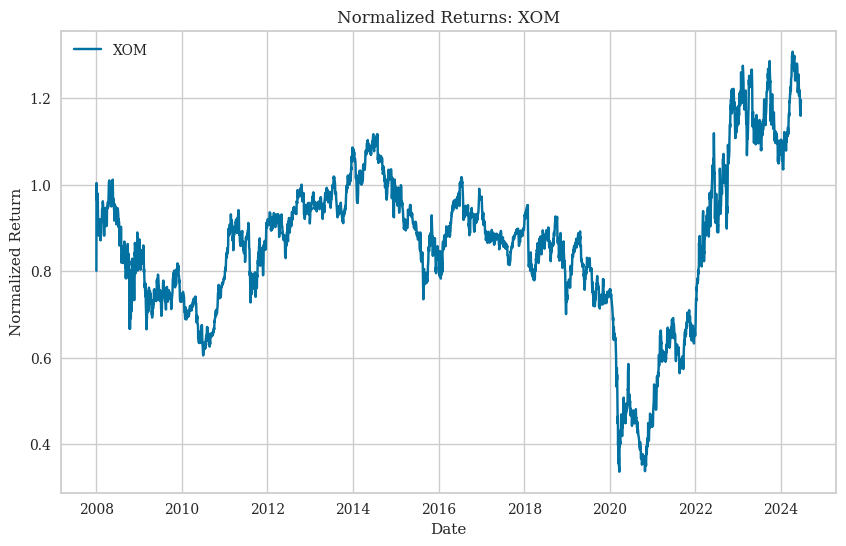

In [ ]:
# Define start and end dates
plt.rcParams['font.family'] = 'serif'
start = datetime.datetime(2008, 1, 1)
end = datetime.datetime(2024, 6, 21)
from sklearn.impute import SimpleImputer

# Fetch data for XOM from Yahoo Finance using yfinance
#df_spx_gradient = yf.download('^GSPC', start=start, end=end)  # Use '^GSPC' instead of 'SPX'
df_xom_gradient = yf.download('XOM', start=start, end=end)  # Use XOM
# Calculate daily returns
df_xom_gradient['Daily_Return'] = df_xom['Adj Close'].pct_change()
#df_spx_gradient['Daily_Return'] = df_spx['Adj Close'].pct_change()

# Normalize returns
df_xom_gradient['Normalized_Return'] = (1 + df_xom_gradient['Daily_Return']).cumprod()
#df_spx_gradient['Normalized_Return'] = (1 + df_spx['Daily_Return']).cumprod()

#Remove Null Values Replace with Mode
#for column in df_xom_gradient.columns:
    #df_spx_gradient[column].fillna(df_spx[column].mode()[0], inplace=True)
for column in df_xom_gradient.columns:
    df_xom[column].fillna(df_xom[column].mode()[0], inplace=True)

# Plot normalized returns
plt.figure(figsize=(10, 6))
plt.plot(df_xom_gradient.index, df_xom['Normalized_Return'], label='XOM')
#plt.plot(df_spx_gradient.index, df_spx_gradient['Normalized_Return'], label='SPX')
plt.xlabel('Date')
plt.ylabel('Normalized Return')
plt.title('Normalized Returns: XOM')
plt.legend()
plt.show()

##Running this GBR analysis code will take approximately 2 minutes. The result will yield a graph comparing actual normalized returns to those predicted by the GBR model.

The red line in the data plot, which is the slope of the values, illustrates how well the model aligns with the actual data.

,Description,Value
0,Session id,123
1,Target,Normalized_Return
2,Target type,Regression
3,Original data shape,"(4144, 8)"
4,Transformed data shape,"(3999, 8)"
5,Transformed train set shape,"(2755, 8)"
6,Transformed test set shape,"(1244, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0042,0.0002,0.0158,0.9982,0.0074,0.0042
1,0.0044,0.0002,0.0135,0.9988,0.0069,0.0045
2,0.0031,0.0001,0.0096,0.9993,0.0059,0.0038
3,0.0043,0.0002,0.0146,0.9984,0.0077,0.0050
4,0.0036,0.0001,0.0110,0.9990,0.0056,0.0038
5,0.0026,0.0001,0.0075,0.9996,0.0046,0.0031
6,0.0040,0.0002,0.0155,0.9981,0.0054,0.0032
7,0.0047,0.0002,0.0152,0.9985,0.0087,0.0056
8,0.0040,0.0002,0.0127,0.9987,0.0067,0.0047


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0050,0.0003,0.0184,0.9976,0.0084,0.0048
1,0.0055,0.0003,0.0163,0.9982,0.0080,0.0055
2,0.0037,0.0001,0.0114,0.9990,0.0070,0.0046
3,0.0054,0.0003,0.0172,0.9977,0.0089,0.0060
4,0.0042,0.0002,0.0137,0.9985,0.0069,0.0044
5,0.0033,0.0001,0.0087,0.9994,0.0052,0.0037
6,0.0047,0.0003,0.0174,0.9976,0.0062,0.0037
7,0.0060,0.0003,0.0181,0.9979,0.0099,0.0068
8,0.0055,0.0002,0.0152,0.9981,0.0082,0.0064


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.0036,0.0002,0.0131,0.9988,0.0068,0.0040


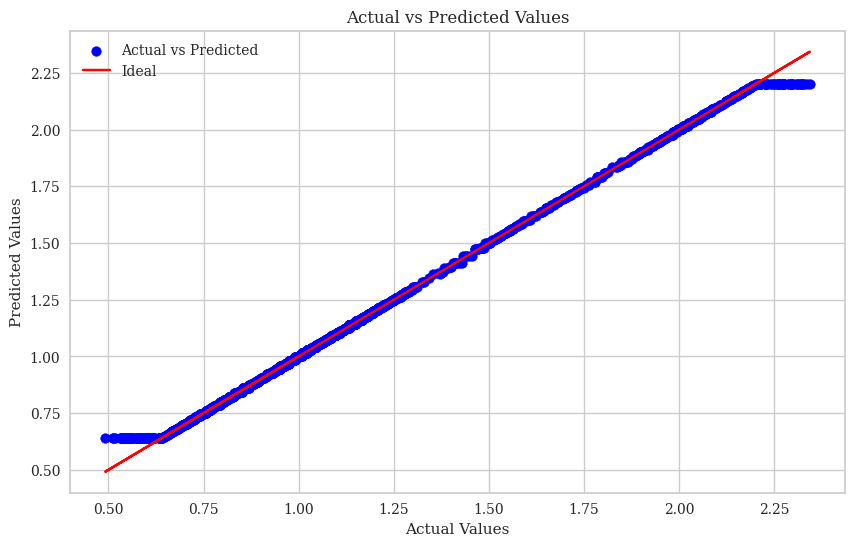

In [ ]:
df_xom_gradient.dropna(subset=['Normalized_Return'], inplace=True)
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting Regressor with desired parameters
gbr = GradientBoostingRegressor(max_depth=3,  # Limiting tree depth
                                 min_samples_split=5,  # Minimum number of samples required to split a node
                                 min_samples_leaf=2,   # Minimum number of samples required to be at a leaf node
                                 subsample=0.8,        # Fraction of samples used for fitting individual base learners
                                 n_iter_no_change=5,   # Number of iterations with no improvement before stopping
                                 validation_fraction=0.1,  # Fraction of training data to set aside as validation set
                                 )

# Assuming df_xom_gradient contains both features and target variable
X_train = df_xom_gradient.drop(columns=['Normalized_Return'])  # Features
y_train = df_xom_gradient['Normalized_Return']  # Target variable

# Fit the model to your training data
gbr.fit(X_train, y_train)

reg_setup = setup(data=df_xom_gradient, target='Normalized_Return', session_id=123, remove_outliers=True)
gbr = create_model('gbr')
tune_model(gbr)
evaluate_model(gbr)
final_gbr = finalize_model(gbr)
new_data = pd.DataFrame(df_xom_gradient)  # Your new data
predictions = predict_model(final_gbr, data=new_data)
#import matplotlib.pyplot as plt

# Extract actual and predicted values from the predictions DataFrame
actual_values = predictions['Normalized_Return']
predicted_values = predictions['prediction_label']

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_values, color='blue', label='Actual vs Predicted')
plt.plot(actual_values, actual_values, color='red', label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()




## CAPM Analysis: Comparing Exxon and S&P 500

1. Execute the provided code block.
2. Observe the calculated **Beta**—a measure of Exxon's overall risk relative to the S&P 500.

Think of Beta as the "risk score" for Exxon in the stock market.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


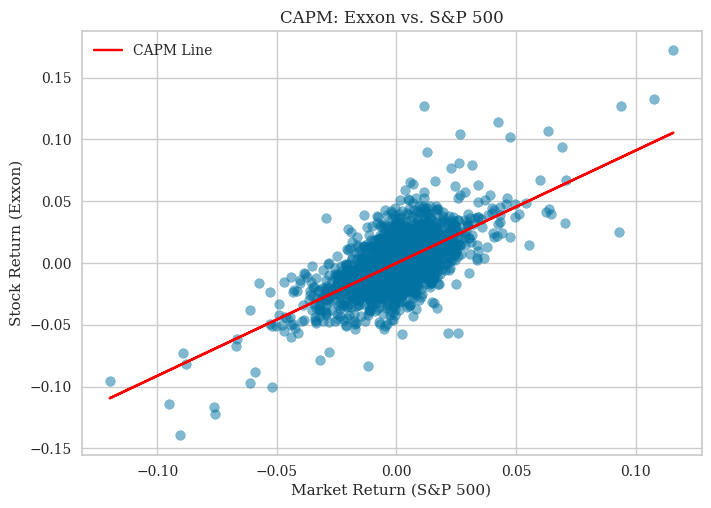

Beta (market risk) for Exxon: 0.9114758295702866


In [ ]:

# Define start and end dates
start = datetime.datetime(2008, 1, 1)
end = datetime.datetime(2024, 6, 21)

# Fetch data for Exxon (XOM) and S&P 500 (SPY) from Yahoo Finance using yfinance
df_xom = yf.download('XOM', start=start, end=end)
df_spx = yf.download('^GSPC', start=start, end=end)

# Calculate daily returns for Exxon and the S&P 500
df_xom['Daily_Return'] = df_xom['Close'].pct_change(1)
df_spx['Daily_Return'] = df_spx['Close'].pct_change(1)

# Drop NaN values
df_xom.dropna(inplace=True)
df_spx.dropna(inplace=True)

# Perform linear regression to estimate beta coefficient (market risk) for Exxon
slope, intercept, r_value, p_value, std_err = stats.linregress(df_spx['Daily_Return'], df_xom['Daily_Return'])

# Plot CAPM regression line
plt.scatter(df_spx['Daily_Return'], df_xom['Daily_Return'], alpha=0.5)
plt.plot(df_spx['Daily_Return'], intercept + slope * df_spx['Daily_Return'], color='red', label='CAPM Line')
plt.xlabel('Market Return (S&P 500)')
plt.ylabel('Stock Return (Exxon)')
plt.title('CAPM: Exxon vs. S&P 500')
plt.legend()
plt.grid(True)
plt.show()

# Output beta coefficient
print("Beta (market risk) for Exxon:", slope)

##NOW YOU CAN CALCULATE THE CORRELATION BETWEEN EXXON AND THE S&P.##

Unlike negative correlation, Exxon and the S&P 500 exhibit a positive correlation. When one moves up, the other tends to move up as well. In contrast, consider the example of negative correlation between gold and the U.S. Dollar: as one moves up, the other may move in the opposite direction.

In [ ]:
# Assuming you have loaded data for 'df_xom' and 'df_spx' dataframes

# Calculate the correlation between daily returns of XOM and SPX
correlation = df_xom['Adj Close'].pct_change().corr(df_spx['Adj Close'].pct_change())

print(f"Correlation between XOM and SPX: {correlation:.4f}")


Correlation between XOM and SPX: 0.6769


**K-means clustering** is a powerful technique used to group similar data points into clusters. It's commonly employed in quantitative finance to identify market regimes or patterns. Let's explore the relationship between K-means clustering, daily percent returns, and the comparison between **Exxon Mobil (XOM)** and the **SPDR S&P 500 ETF (SPY)**.

1. **K-Means Clustering**:
    - K-means aims to partition data into separate subgroups or clusters.
    - Each observation is assigned to a unique cluster based on its similarity to the mean feature vector of that cluster.
    - The goal is to minimize the Within-Cluster Variation (WCV), which measures how much observations within a cluster differ from each other.
    - K-means is a **hard clustering** technique, meaning each observation belongs to exactly one cluster.
    - It can be seen as a super-sparse version of **Principal Component Analysis (PCA)**.

2. **PCA and K-means Relationship**:
    - PCA seeks to represent data vectors as linear combinations of a small number of eigenvectors, minimizing mean-squared reconstruction error.
    - K-means represents data vectors via a small number of cluster centroids, also minimizing mean-squared reconstruction error.
    - Ding & He (2004) showed that principal components are continuous solutions to the discrete cluster membership indicators for K-means clustering.
    - While PCA reduces feature dimensions, K-means compresses data points by summarizing them with cluster centroids.

3. **Application to Daily Percent Returns**:
    - Applying K-means to daily percent returns of Exxon and the S&P 500 could reveal distinct market regimes.
    - By clustering these returns, we might identify periods of similar behavior (e.g., bullish, bearish, or volatile).
    - However, it's essential to preprocess the data appropriately (e.g., handle missing values, normalize, etc.) before applying K-means.

4. **Interpretation**:
    - If Exxon and the S&P returns cluster together, it suggests similar market conditions.
    - If they form separate clusters, it indicates different behaviors.
    - Keep in mind that K-means doesn't guarantee causality or predictive power—it's a descriptive tool.

Remember that financial data can be noisy, and clustering results may vary based on the choice of features, preprocessing, and the number of clusters (K). Always validate findings with domain knowledge and consider other techniques.

Feel free to explore this relationship further and adapt the analysis to your specific context! 📈🔍

Source: Conversation with Bing, 4/7/2024
(1) K-Means Clustering of Daily OHLC Bar Data | QuantStart. https://www.quantstart.com/articles/k-means-clustering-of-daily-ohlc-bar-data/.
(2) What is the relation between k-means clustering and PCA?. https://stats.stackexchange.com/questions/183236/what-is-the-relation-between-k-means-clustering-and-pca.
(3) XOM vs. SPY — ETF comparison tool | PortfoliosLab. https://portfolioslab.com/tools/stock-comparison/XOM/SPY.
(4) Finding the k in k-means (And how PCA fits into the story). https://medium.com/@harishkandan95/finding-the-k-in-k-means-and-how-pca-fits-into-the-story-25dc30f3f9cc.
(5) PCA vs. K-means clustering - explained variance - Cross Validated. https://stats.stackexchange.com/questions/335237/pca-vs-k-means-clustering-explained-variance.
(6) K-means Clustering via Principal Component Analysis - ICML. https://icml.cc/Conferences/2004/proceedings/papers/262.pdf.
(7) How to Combine PCA and K-means Clustering in Python?. https://365datascience.com/tutorials/python-tutorials/pca-k-means/.

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


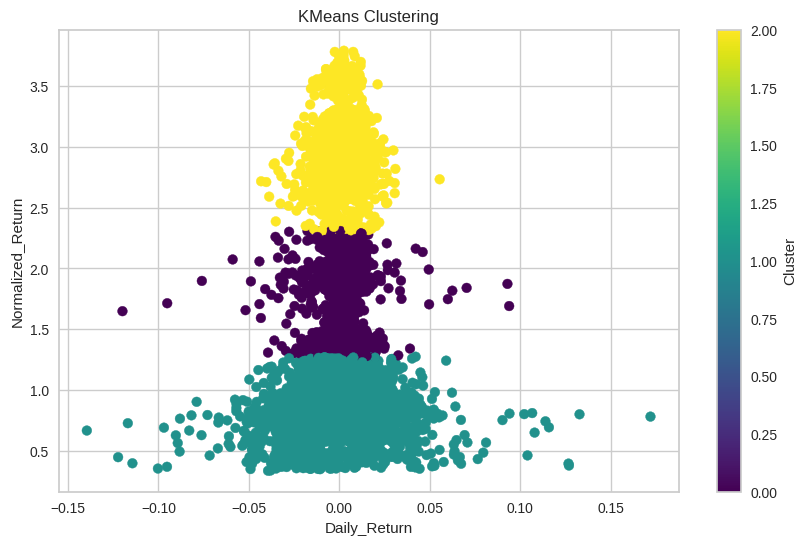

Cluster 0:
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2013-12-31  1842.609985  1849.439941  1842.410034  1848.359985  1848.359985   
2014-01-15  1840.520020  1850.839966  1840.520020  1848.380005  1848.380005   
2014-01-16  1847.989990  1847.989990  1840.300049  1845.890015  1845.890015   
2014-02-24  1836.780029  1858.709961  1836.780029  1847.609985  1847.609985   
2014-02-27  1844.900024  1854.530029  1841.130005  1854.290039  1854.290039   
...                 ...          ...          ...          ...          ...   
2024-04-23   120.000000   121.059998   119.449997   121.029999   121.029999   
2024-04-24   120.300003   121.260002   119.389999   121.050003   121.050003   
2024-04-25   121.029999   121.760002   119.400002   121.330002   121.330002   
2024-04-29   117.760002   120.050003   117.760002   119.639999   119.639999   
2024-05-17   118.300003   119.830002   11

In [ ]:

# Define start and end dates
start = datetime.datetime(2008, 1, 1)
end = datetime.datetime(2024, 6, 21)

# Fetch data for S&P 500 (SPX) from Yahoo Finance using yfinance
df_spx = yf.download('^GSPC', start=start, end=end)  # Use '^GSPC' instead of 'SPX'
df_xom = yf.download('XOM', start=start, end=end)  # Use XOM
# Calculate daily returns
df_xom['Daily_Return'] = df_xom['Adj Close'].pct_change()
df_spx['Daily_Return'] = df_spx['Adj Close'].pct_change()

# Normalize returns
df_xom['Normalized_Return'] = (1 + df_xom['Daily_Return']).cumprod()
df_spx['Normalized_Return'] = (1 + df_spx['Daily_Return']).cumprod()

#Remove Null Values Replace with Mode
for column in df_spx.columns:
    df_spx[column].fillna(df_spx[column].mode()[0], inplace=True)
for column in df_xom.columns:
    df_xom[column].fillna(df_xom[column].mode()[0], inplace=True)
from sklearn.cluster import KMeans


# Example DataFrames df_spx and df_xom
# Assuming df_spx and df_xom are already defined and contain the necessary data

# Concatenate the two DataFrames vertically
df_concatenated = pd.concat([df_spx, df_xom])

# Assuming you have already selected the features you want to use for clustering
features = ['Daily_Return', 'Normalized_Return']  # Replace 'feature1', 'feature2', ... with actual feature names

# Prepare the data for clustering
X = df_concatenated[features]

# Define the number of clusters
num_clusters = 3  # You can adjust this as needed

# Initialize the KMeans model
kmeans = KMeans(n_clusters=num_clusters)

# Fit the KMeans model to the data
kmeans.fit(X)

# Add cluster labels to the concatenated DataFrame
df_concatenated['cluster'] = kmeans.labels_

# Visualize the clusters (assuming you have two features)
plt.figure(figsize=(10, 6))
plt.scatter(df_concatenated['Daily_Return'], df_concatenated['Normalized_Return'], c=df_concatenated['cluster'], cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Daily_Return')
plt.ylabel('Normalized_Return')
plt.colorbar(label='Cluster')
plt.show()

# You can access individual clusters by filtering the DataFrame based on cluster labels
for cluster_label in range(num_clusters):
    cluster_data = df_concatenated[df_concatenated['cluster'] == cluster_label]
    print(f"Cluster {cluster_label}:")
    print(cluster_data)

##The code for creating these boxplots was originally sourced from plotly.com and then customized for this analysis. It's open source, and you can find licensing details on plotly.com.##

A **box plot**, also known as a **box and whisker plot**, provides a snapshot of how data is distributed. Imagine you have a bunch of numbers (like test scores or temperatures), and you want to understand their overall pattern. Here's what a box plot does:

1. **Five-Number Summary**: It shows five key values:
   - **Minimum Score**: The lowest value (excluding any extreme outliers).
   - **Lower Quartile (Q1)**: The value below which 25% of the data falls.
   - **Median**: The middle value (50% of the data is above, and 50% is below).
   - **Upper Quartile (Q3)**: The value below which 75% of the data falls.
   - **Maximum Score**: The highest value (excluding any extreme outliers).

2. **Visual Representation**:
   - The box represents the middle 50% of the data (from Q1 to Q3).
   - The line inside the box is the median.
   - The "whiskers" extend from the box to the minimum and maximum scores (excluding outliers).
   - Outliers (extreme values) are shown as individual points beyond the whiskers.

3. **Usefulness**:
   - **Comparing Groups**: Box plots are great for comparing different groups. For example, you can compare the test scores of students from two schools.
   - **Spotting Skewness**: If the whiskers are uneven or the median isn't in the middle of the box, it tells you whether the data is skewed (lopsided) or symmetric (evenly distributed).

Remember, box plots condense a lot of information into a simple visual, making it easier to understand data patterns!

Source: Conversation with Copilot, 6/27/2024
(1) Box Plot Explained: Interpretation, Examples, & Comparison. https://www.simplypsychology.org/boxplots.html.
(2) Box Plot Explained with Examples - Statistics By Jim. https://statisticsbyjim.com/graphs/box-plot/.
(3) Understanding Boxplots: How to Read and Interpret a Boxplot - Built In. https://builtin.com/data-science/boxplot.

In [ ]:
# Define start and end dates
start = datetime.datetime(2008, 1, 1)
end = datetime.datetime(2024, 6, 21)

# Fetch data for S&P 500 (SPX) from Yahoo Finance using yfinance
df_spx = yf.download('^GSPC', start=start, end=end)  # Use '^GSPC' instead of 'SPX'
df_xom = yf.download('XOM', start=start, end=end)  # Use XOM
# Calculate daily returns
df_xom['Daily_Return'] = df_xom['Adj Close'].pct_change()
df_spx['Daily_Return'] = df_spx['Adj Close'].pct_change()

# Normalize returns
df_xom['Normalized_Return'] = (1 + df_xom['Daily_Return']).cumprod()
df_spx['Normalized_Return'] = (1 + df_spx['Daily_Return']).cumprod()

#Remove Null Values Replace with Mode
for column in df_spx.columns:
    df_spx[column].fillna(df_spx[column].mode()[0], inplace=True)
for column in df_xom.columns:
    df_xom[column].fillna(df_xom[column].mode()[0], inplace=True)
fig = go.Figure()
fig.add_trace(go.Box(
    y=df_xom['Close'],
    name="All Points",
    jitter=0.3,
    pointpos=-1.8,
    boxpoints='all', # represent all points
    marker_color='rgb(7,40,89)',
    line_color='rgb(7,40,89)'
))

fig.add_trace(go.Box(
    y=df_xom['Close'],
    name="Only Whiskers",
    boxpoints=False, # no data points
    marker_color='rgb(9,56,125)',
    line_color='rgb(9,56,125)'
))

fig.add_trace(go.Box(
    y=df_xom['Close'],
    name="Suspected Outliers",
    boxpoints='suspectedoutliers', # only suspected outliers
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
))

fig.add_trace(go.Box(
     y=df_xom_gradient['Close'],
    name="Whiskers and Outliers",
    boxpoints='outliers', # only outliers
    marker_color='rgb(107,174,214)',
    line_color='rgb(107,174,214)'
))


fig.update_layout(title_text="Box Plots Styling Outliers XOM 2008-2024")
fig.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


##The code for creating these distribution curves was originally sourced from plotly.com and then customized for this analysis. It's open source, and you can find licensing details on plotly.com.##


Imagine you have two groups of data:
1. **Random Data**: This group follows a standard distribution (like the familiar bell curve). It represents typical randomness, like rolling dice or measuring heights of people.
2. **Your Data**: This group contains real-world data you've collected, such as test scores or temperatures.

Advantages of comparing these two distributions:

1. **Benchmarking**:
   - You can use the random distribution as a benchmark. It's like saying, "If everything were random, what would we expect?"
   - Then you compare your actual data (the second distribution) to this benchmark. If your data behaves differently, it's interesting!

2. **Detecting Patterns or Anomalies**:
   - If your data significantly deviates from randomness, it might reveal patterns or anomalies.
   - For example, if your test scores are consistently higher than random chance, it suggests something interesting is happening (maybe better teaching or student effort).

3. **Hypothesis Testing**:
   - Scientists and analysts use this approach to test hypotheses. They compare observed data to what randomness predicts.
   - If the difference is too big, they conclude that something other than randomness is at play.

In summary, comparing random and real-world data helps us understand what's typical and what's exceptional. It's like having a "normal" yardstick to measure against!



In [ ]:


# Extract 'Close' column data from int DataFrame
close_xom = df_xom['Close']

# Define the number of samples to match the length of the 'Close' data
num_samples = 200

# Generate random data for comparison purposes
x2 = np.random.randn(num_samples) + 2  # Keeping this for comparison, you can remove it if not needed

group_labels = ['Close from Exxon DataFrame', 'Random Data']  # Updated group labels

colors = ['slategray', 'magenta']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot([close_xom, x2], group_labels, bin_size=.5,
                         curve_type='normal',  # override default 'kde'
                         colors=colors)

# Add title
fig.update_layout(title_text='Exxon with normal Distribution')
fig.show()


##The code for creating these distribution curves was originally sourced from plotly.com and then customized for this analysis. It's open source, and you can find licensing details on plotly.com.##

1. **What's PCA?**
   - Imagine you have a bunch of data points (like test scores or measurements).
   - PCA (Principal Component Analysis) helps you find the most important directions in your data.

2. **Reducing Dimensions**:
   - Think of your data as a cloud of points in a high-dimensional space (like a 3D cloud).
   - PCA squashes this cloud into a lower-dimensional space (like a 2D or 3D plane).

3. **The Process**:
   - PCA finds new axes (called principal components) that capture the most variation in your data.
   - The first principal component explains the most variation, the second explains the next most, and so on.

4. **Scatterplots**:
   - Now, imagine plotting your data points using these new axes.
   - Each point's position tells you how much it aligns with the principal components.
   - Scatterplots show how your data spreads out along these axes.

5. **Why It's Innovative**:
   - You can see patterns, clusters, or outliers.
   - It simplifies complex data while preserving essential info.

Remember, PCA scatterplots help you see the big picture in your data!

Source: Conversation with Copilot, 6/27/2024
(1) How to interpret graphs in a principal component analysis. https://blogs.sas.com/content/iml/2019/11/04/interpret-graphs-principal-components.html.
(2) How to Plot a 3D PCA Scatterplot (with Python Example). https://www.jcchouinard.com/pca-plot-3d-pca-graph-python/.
(3) Principal Component Analysis Guide & Example - Statistics By Jim. https://statisticsbyjim.com/basics/principal-component-analysis/.
(4) Principal Component Analysis (PCA) simply explained. https://biostatsquid.com/pca-simply-explained/.

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA

df = df_spx.copy()
features = ["Open", "Adj Close", "Volume"]

pca = PCA()
components = pca.fit_transform(df[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(3),
    color=df["Normalized_Return"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

##The code for creating these distribution curves was originally sourced from plotly.com and then customized for this analysis. It's open source, and you can find licensing details on plotly.com.##

1. **What Is PCA?**
   - PCA is a powerful technique for **dimensionality reduction**.
   - It helps simplify complex data by finding the most important features (principal components) while preserving essential information.

2. **What Does the Code Do?**
   - The snippet initializes a PCA object with default settings.
   - You can customize parameters like the number of components to keep (`n_components`).

3. **Why Is It Important?**
   - **Reducing Dimensions**: High-dimensional data can be hard to visualize and analyze. PCA transforms it into a lower-dimensional space.
   - **Feature Selection**: It identifies which features contribute most to the data's variability.
   - **Noise Reduction**: By focusing on key components, PCA filters out noise and redundancy.
   - **Visualization**: PCA scatterplots help visualize data clusters, patterns, and outliers.

In summary, PCA is a Swiss Army knife for data analysis—it simplifies, clarifies, and reveals hidden insights!

Source: Conversation with Copilot, 6/27/2024
(1) PCA — scikit-learn 1.5.0 documentation. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html.
(2) Principal Component Analysis (PCA) in Python with Scikit-Learn. https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/.
(3) Kernel PCA — scikit-learn 1.5.0 documentation. https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html.
(4) decomposition.PCA() - Scikit-learn - W3cubDocs. https://docs.w3cub.com/scikit_learn/modules/generated/sklearn.decomposition.pca.html.
(5) Implementing PCA in Python with scikit-learn - GeeksforGeeks. https://www.geeksforgeeks.org/implementing-pca-in-python-with-scikit-learn/.

In [ ]:
from sklearn.decomposition import PCA

df = df_spx.copy()
X = df[['Open', 'Adj Close', 'Volume']]

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['Normalized_Return'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

##The code for creating these distribution curves was originally sourced from plotly.com and then customized for this analysis. It's open source, and you can find licensing details on plotly.com.##

1. **The 3D Map Analogy**:
   - Imagine you have a map, but instead of flat paper, it's a three-dimensional landscape.
   - Each point on this map represents a specific location (like a city or a mountain peak).
   - The height of the surface at each point corresponds to a value (temperature, elevation, or any other measurement).

2. **Creating the Surface**:
   - In a 3D surface plot, we take data points and plot them in a three-dimensional space.
   - These points create a surface that shows how the data varies across different positions.
   - Think of it as looking at a 3D map, where the height of the surface represents the value of the data at each point.

3. **Visualizing Variations**:
   - The surface can be smooth or rugged, depending on how the data changes.
   - Peaks and valleys on the surface indicate where the data values are high or low.
   - It's like exploring a hilly landscape—each hill or valley corresponds to a different data value.

In summary, 3D surface plots help us visualize complex data in three dimensions, revealing patterns, trends, and variations. Below is plot for Exxon.

Source: Conversation with Copilot, 6/27/2024
(1) how to make 3D Surface plot in origin in one minute| simplest method|origin 2020. https://www.youtube.com/watch?v=GbMXmCpPw0A.
(2) Matplotlib Tutorial 7: Creating 3D Surface Plots with mplot3d. https://www.youtube.com/watch?v=8h2YhqoUsEw.
(3) 3D surface plots in Origin. https://www.youtube.com/watch?v=LZtlTdMJ6zA.
(4) Surface plot - MATLAB surf - MathWorks. https://www.mathworks.com/help/matlab/ref/surf.html.
(5) Matplotlib - 3D Surface Plots - Online Tutorials Library. https://www.tutorialspoint.com/matplotlib/matplotlib_3d_surface_plot.htm.
(6) Interpret the key results for 3D Surface Plot - Minitab. https://support.minitab.com/minitab/help-and-how-to/graphs/3d-surface-plot/interpret-the-results/key-results/.
(7) Representing Data as a Surface - MATLAB & Simulink - MathWorks. https://www.mathworks.com/help/matlab/visualize/representing-a-matrix-as-a-surface.html.

In [ ]:
import plotly.graph_objects as go  # Importing Plotly's graph_objects module

# create figure
fig = go.Figure()

# Add surface trace
fig.add_trace(go.Surface(z=df_xom.values.tolist(), colorscale="Viridis"))

# Update plot sizing
fig.update_layout(
    width=800,
    height=900,
    autosize=False,
    margin=dict(t=0, b=0, l=0, r=0),
    template="plotly_white",
)

# Update 3D scene options
fig.update_scenes(
    aspectratio=dict(x=1, y=1, z=0.7),
    aspectmode="manual"
)

# Add dropdown
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=["type", "surface"],
                    label="3D Surface",
                    method="restyle"
                ),
                dict(
                    args=["type", "heatmap"],
                    label="Heatmap",
                    method="restyle"
                )
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=1.1,
            yanchor="top"
        ),
    ]
)

# Add annotation
fig.update_layout(
    annotations=[
        dict(text="Trace type:", showarrow=False,
        x=0, y=1.085, yref="paper", align="left")
    ]
)

fig.show()


##The code for creating these distribution curves was originally sourced from plotly.com and then customized for this analysis. It's open source, and you can find licensing details on plotly.com.##

The scatter plot created using Plotly shows the relationship between the "Adj Close" and "Close" values for data for Exxon. Let's break it down:

1. **Scatter Plot Basics**:
   - A scatter plot uses dots (points) to represent values for two different numeric variables.
   - The horizontal axis (x-axis) corresponds to the "Adj Close" values, and the vertical axis (y-axis) corresponds to the "Close" values.
   - Each dot on the plot represents an individual data point from your DataFrame.

2. **Color and Size**:
   - The color of each dot is determined by the "Normalized_Return" value.
   - The size of the dots is based on the "Open" value.
   - Hovering over a dot reveals additional information (like the specific "Close" value).

3. **Interpretation**:
   - Look at the overall pattern of the dots:
     - If they form a clear trend (e.g., increasing or decreasing), it indicates a relationship.
     - If they're scattered randomly, there might be no strong association.
   - Pay attention to any deviations from the pattern (outliers).
   - Consider the context of the variables (e.g., stock market data in this case).

In summary, this scatter plot helps visualize how "Adj Close" and "Close" values relate to each other, considering color, size, and individual data points.

Source: Conversation with Copilot, 6/27/2024
(1) Scatter Diagram (Scatter Plot): Detailed Illustration With Examples. https://www.youtube.com/watch?v=5GihhMCPucg.
(2) Maths Tutorial: Interpreting Scatterplots (statistics). https://www.youtube.com/watch?v=PE_BpXTyKCE.
(3) Scatter Plot in Excel / Scatter Diagram Interpretation and Creation by ExcelDestination. https://www.youtube.com/watch?v=u1kptXEUEWw.
(4) Describing scatterplots (form, direction, strength, outliers). https://www.khanacademy.org/math/ap-statistics/bivariate-data-ap/scatterplots-correlation/a/describing-scatterplots-form-direction-strength-outliers.
(5) Mastering Scatter Plots: Visualize Data Correlations - Atlassian. https://www.atlassian.com/data/charts/what-is-a-scatter-plot.
(6) 9.1 Introduction to Bivariate Data and Scatterplots. https://pressbooks.lib.vt.edu/introstatistics/chapter/scatter-plots/.
(7) Scatterplots and Correlation - University of West Georgia. https://www.westga.edu/academics/research/vrc/assets/docs/scatterplots_and_correlation_notes.pdf.
(8) en.wikipedia.org. https://en.wikipedia.org/wiki/Scatter_plot.

In [ ]:
df = df_xom.copy()
fig = px.scatter(df, x="Adj Close", y="Close", color="Normalized_Return",
                 size='Open', hover_data=['Close'])
fig.show()